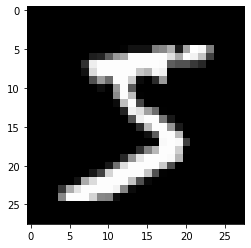

In [1]:
import numpy as np
import matplotlib.pyplot as plt

####### Step 1

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()

In [53]:
####### Step 2

# separate first 100 pics from train set

train_set_f100 = train_set[:60000]

In [56]:
print(len(test_set))


10000


In [66]:

def sigmoid_activation(x):
	return 1.0 / (1 + np.exp(-x))

def predict(train_set, w, b): 

    w_layer_2 = w[0]
    b_2 = b[0]
    
    w_layer_3 = w[1]
    b_3 = b[1]
    
    w_layer_4 = w[2]
    b_4 = b[2]

    a_s = []

    # layer 2
    a_2 = np.zeros((16, 1))
    a_2 = sigmoid_activation(w_layer_2 @ train_set[0] + b_2)
    a_s.append(np.transpose(a_2)[0].reshape(16,1))
    
    # layer 3
    a_3 = np.zeros((16, 1))
    a_3 = sigmoid_activation(w_layer_3 @ a_2 + b_3)
    a_s.append(np.transpose(a_3)[0].reshape(16,1))

    # layer 4
    a_4 = np.zeros((10, 1))
    a_4 = sigmoid_activation(np.transpose(w_layer_4 @ a_3) + b_4)
    a_4 = a_4[0].reshape(10,1)
    a_s.append(a_4)

    return a_4, a_s

def cal_accuracy(test_set, w, b):

    correct = 0
    for i in range(len(test_set)):
        pre, _ = predict(train_set[i], w, b)

        #print(pre)
        #print("0000000000000000000000000000000000000000000000000000000")
        # examine
        if np.argmax(pre) == np.argmax(train_set[i][1]):
            correct += 1

    accuracy = correct/len(test_set)
    return accuracy

b = [np.zeros(16), np.zeros(16), np.zeros(10)] 
w = [np.random.randn(16, 784), np.random.randn(16, 16), np.random.randn(10, 16)]

acc = cal_accuracy(test_set, w, b)
acc

0.1073

In [71]:
####### Step 3
import copy

def next_batch(dataset, batchSize):
    for i in range(0, len(dataset), int(batchSize)):
        yield dataset[i:i + int(batchSize)]

cost_av = np.zeros(5)

learning_rate = 1
number_of_epochs = 5
batch_size = 50 
loss = None

b = [np.zeros(16), np.zeros(16), np.zeros(10)] 
#w = [np.random.rand(16,784), np.random.rand(16,16), np.random.rand(10,16)]

w = [np.random.randn(16, 784), np.random.randn(16, 16), np.random.randn(10, 16)]


for i in range(number_of_epochs):
    cost = 0
    cost_1 = 0

    for batch in list(next_batch(train_set_f100, batch_size)):

        grad_b = [np.zeros(16), np.zeros(16), np.zeros(10)] 
        grad_w = [np.zeros((16,784)), np.zeros((16,16)), np.zeros((10,16))]
        #grad_a = [np.zeros(16), np.zeros(16), np.zeros(10)]
        for image in batch:
            ans, a_s = predict(image, w, b)
            ans = ans.reshape(10,1)
            a_2 = a_s[0]
            a_3 = a_s[1]
            a_4 = a_s[2]

            # ws of layer 4
            dcost_dw_4 = np.random.rand(10,16)
            dcost_db_4 = np.zeros(10)
            dcost_a_3 = np.zeros(16).reshape(16,1)

            #for j in range(10):
                #z = np.dot(w[2][j].reshape(1,16), a_3)[0][0]
                #for k in range(16):
                    #dcost_dw_4[j, k] = 2*(ans[j] - image[1][j])*sigmoid_activation(z)*(1-sigmoid_activation(z))*a_3[k]
                #dcost_db_4[j] = 2*(ans[j] - image[1][j])*sigmoid_activation(z)*(1-sigmoid_activation(z))
                #cost += (ans[j] - image[1][j])**2

            
            z = (w[2] @ a_3)
            dcost_dw_4 = (2*(ans - image[1]).reshape(10,1))*np.transpose(np.transpose(sigmoid_activation(z)*(1-sigmoid_activation(z)))* a_3)
            dcost_db_4 = (2*(ans - image[1])).reshape(10,1)*sigmoid_activation(z)*(1-sigmoid_activation(z))
            dcost_db_4 = dcost_db_4.reshape(10,)
            cost += ((ans - image[1])**2).sum()


            #as for layer 3
            #for k in range(16):
                #for j in range(10):
                    #z = np.dot(w[2][j].reshape(1,16), a_3)[0][0]
                    #dcost_a_3[k] +=  2*(ans[j] - image[1][j])*sigmoid_activation(z)*(1-sigmoid_activation(z))*w[2][j, k]

            dcost_a_3 = (np.transpose(2*(ans - image[1]).reshape(10,1)*(sigmoid_activation(z)*(1-sigmoid_activation(z)))) @ w[2])[0].reshape(16,1)


            # ws of layer 3
            dcost_dw_3 = np.random.rand(16,16)
            dcost_db_3 = np.zeros(16)
            dcost_a_2 = np.zeros(16).reshape(16,1)


            #for j in range(16):
                #z = np.dot(w[1][j].reshape(1,16), a_2)[0][0]
                #for k in range(16):
                    #dcost_dw_3[j, k] = dcost_a_3[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))*a_2[k][0]
                #dcost_db_3[j] = dcost_a_3[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))
                        
            z = (w[1] @ a_2)            
            dcost_dw_3 = dcost_a_3*np.transpose(np.transpose(sigmoid_activation(z)*(1-sigmoid_activation(z)))* a_2)
            dcost_db_3 = dcost_a_3.reshape(16,1)*sigmoid_activation(z)*(1-sigmoid_activation(z))
            dcost_db_3 = dcost_db_3.reshape(16,)

            ##dcost_db_4 = (2*(ans - image[1])).reshape(10,1)*sigmoid_activation(z)*(1-sigmoid_activation(z))
            ##dcost_db_4 = dcost_db_4.reshape(10,)

            #as for layer 2
            #for k in range(16):
                #for j in range(16):
                    #z = np.dot(w[1][j].reshape(1,16), a_2)[0][0]
                    #dcost_a_2[k] += dcost_a_3[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))*w[1][j, k]
            
            dcost_a_2 = ((np.transpose(dcost_a_3*(sigmoid_activation(z)*(1-sigmoid_activation(z))))[0]) @ w[1]).reshape(16,1)


            # ws of layer 2
            dcost_dw_2 = np.random.rand(16,784)
            dcost_db_2 = np.zeros(16)


            #for j in range(16):
                #z = np.dot(w[0][j].reshape(1,784), image[0])[0][0]
                #for k in range(784):
                    #dcost_dw_2[j, k] = dcost_a_2[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))*image[0][k]
                #dcost_db_2[j] = dcost_a_2[j]*sigmoid_activation(z)*(1-sigmoid_activation(z))

            z = (w[0] @ image[0])            
            dcost_dw_2 = dcost_a_2*np.transpose(np.transpose(sigmoid_activation(z)*(1-sigmoid_activation(z)))* image[0])
            dcost_db_2 = dcost_a_2.reshape(16,1)*sigmoid_activation(z)*(1-sigmoid_activation(z))
            dcost_db_2 = dcost_db_2.reshape(16,)


            grad_w[2] = grad_w[2] + dcost_dw_4
            grad_w[1] = grad_w[1] + dcost_dw_3
            grad_w[0] = grad_w[0] + dcost_dw_2
            # grad_b += dcost/db
            grad_b[2] = grad_b[2] + dcost_db_4
            grad_b[1] = grad_b[1] + dcost_db_3
            grad_b[0] = grad_b[0] + dcost_db_2

        # W = W - (learning_rate × (grad_W / batch_size))
        w[2] = w[2] - (learning_rate*(grad_w[2]/batch_size))
        w[1] = w[1] - (learning_rate*(grad_w[1]/batch_size))
        w[0] = w[0] - (learning_rate*(grad_w[0]/batch_size))
        # b = b - (learning_rate × (grad_b / batch_size))
        b[2] = b[2] - (learning_rate*(grad_b[2]/batch_size))
        b[1] = b[1] - (learning_rate*(grad_b[1]/batch_size))
        b[0] = b[0] - (learning_rate*(grad_b[0]/batch_size))
    
    cost_av[i] = cost/100


acc = cal_accuracy(test_set, w, b)

#print(w)
#print(b)
print(acc)
print(cost_av)





0.9098
[307.35205344 157.48024514 121.39977999 104.50374232  94.70695181]


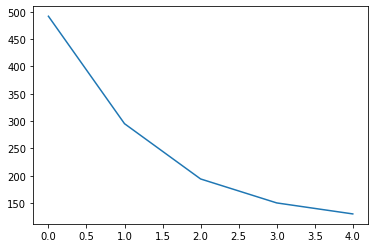

In [52]:
x = np.arange(5)
# corresponding y axis values
y = cost_av
  
# plotting the points 
plt.plot(x, y)